## Visualization of all training runs

In [1]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

2024-08-27 17:40:52.397603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "sac_3_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/meeting_training/seqsac_3_1', 'training/meeting_training/sac_3_1']

In [3]:
df = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        df.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")

training/meeting_training/seqsac_3_1
seqsac_3
succes
training/meeting_training/sac_3_1
sac_3
succes
all success


In [4]:
df = pd.concat(df)
df = df[df['avg_reward_sum'].notna()]

In [5]:
display(df["dir_name"].unique())

array(['seqsac_3', 'sac_3'], dtype=object)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


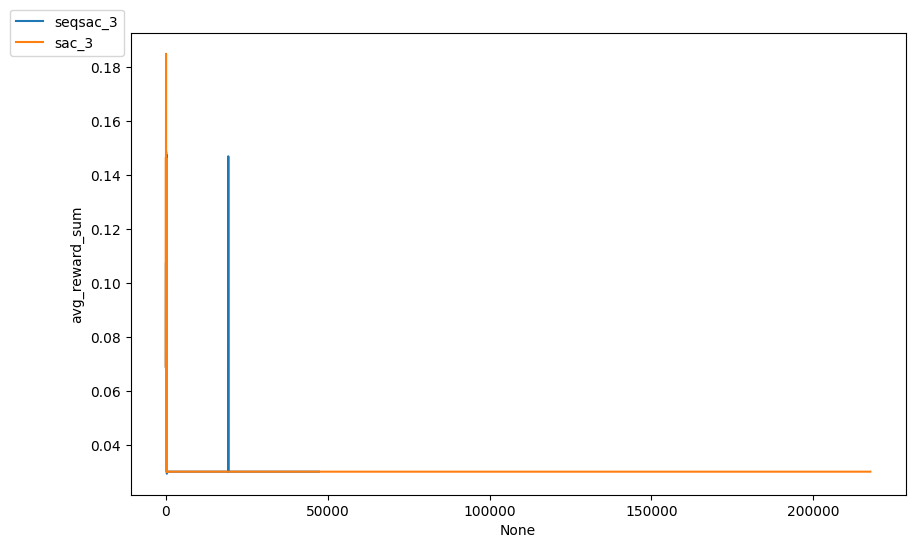

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

In [7]:
# # recursively read tensorboard files
# tb_files = []
# # for filename in glob('**/events.out.tfevents.*', recursive=True):
# #     tb_files.append(filename)
# for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
#     tb_files.append(filename)
# for filename in glob('**/seqdqn_***', recursive = True):
#     tb_files.append(filename)
# for filename in glob('**/dqn_**', recursive = True):
#     tb_files.append(filename)
# for filename in glob('**/seqsac_**', recursive = True):
#     tb_files.append(filename)
# for filename in glob('**/sac_**', recursive = True):
#     tb_files.append(filename)

# # tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
# tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# # tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# # print([file for file in tb_files if not "eudist" in file])
# tb_files = [file for file in tb_files if "dqn_3_1" in file ]

# # tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
# tb_files

In [8]:
# df = []
# for file in tb_files:
#     reader = SummaryReader(file, pivot = True)
#     temp_df = reader.scalars
#     if "meeting_training/sac_" in reader.log_path:
#         temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
#     print(reader.log_path)
#     if "rollout/reward_sum" in temp_df.columns:
#         temp_df = temp_df[["step", "rollout/reward_sum"]] 
#         print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
#         temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
#         # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
#         temp_df["step"] = temp_df.index

#         if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
#             temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
#         temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
#         temp_df = temp_df[temp_df.step > 25]
#         temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
#         # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
#         temp_df.dropna()
#         df.append(temp_df)
#         print("succes")
#     else:
#         print("reward logs not found")
# print("all success")

# df = pd.concat(df)
# df = df[df['avg_reward_sum'].notna()]

In [9]:
# plt.figure(figsize=(10,6))
# # df3 = df2[df2["dir_name"].str.contains("dqn_")]
# sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# # sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# # plt.legend([],[], frameon = False)
# # sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# # sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
# plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

training/meeting_training/seqdqn_4_1
seqdqn_4
succes
training/meeting_training/dqn_4_1
dqn_4
succes
all success


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


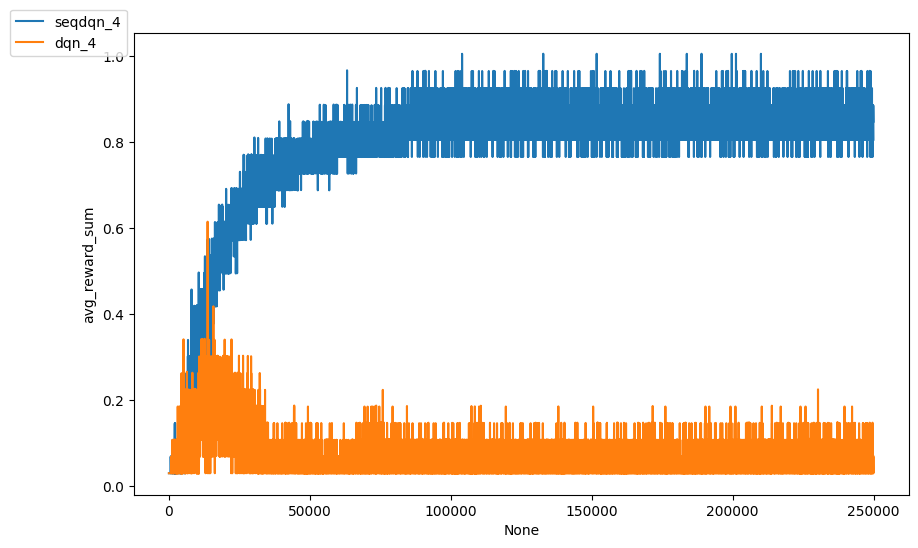

In [10]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "dqn_4_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
df = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<250000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        df.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")
df = pd.concat(df)
df = df[df['avg_reward_sum'].notna()]
df2 = df

plt.figure(figsize=(10,6))
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

training/meeting_training/seqsac_4_1
seqsac_4
succes
training/meeting_training/sac_4_1
sac_4
succes
all success


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


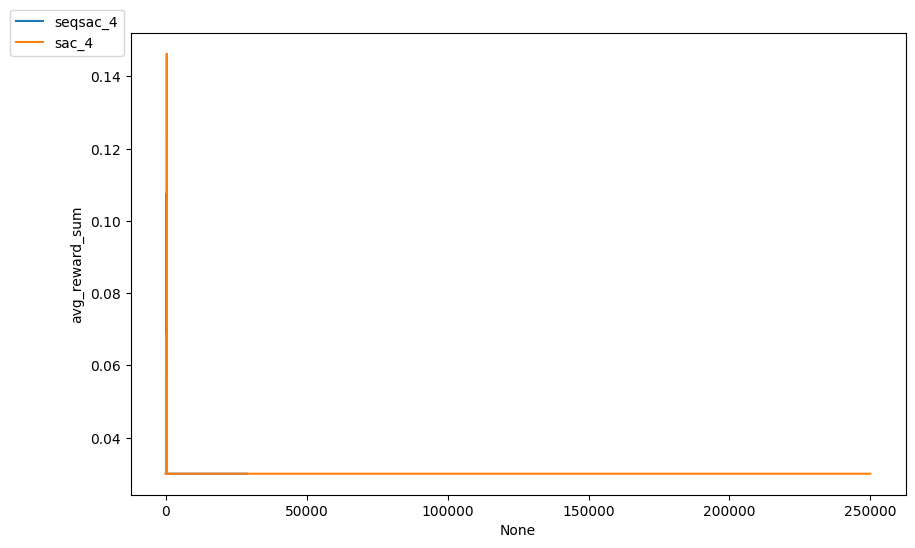

In [11]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "sac_4_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
df = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<250000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        df.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")
df = pd.concat(df)
df = df[df['avg_reward_sum'].notna()]
df2 = df

plt.figure(figsize=(10,6))
sns.lineplot(data = df, x = df.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

training/meeting_training/seqdqn_5_1
seqdqn_5
succes
training/meeting_training/dqn_5_1
dqn_5
succes
training/meeting_training/seqsac_5_1
seqsac_5
succes
training/meeting_training/sac_5_1
sac_5
succes
all success


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

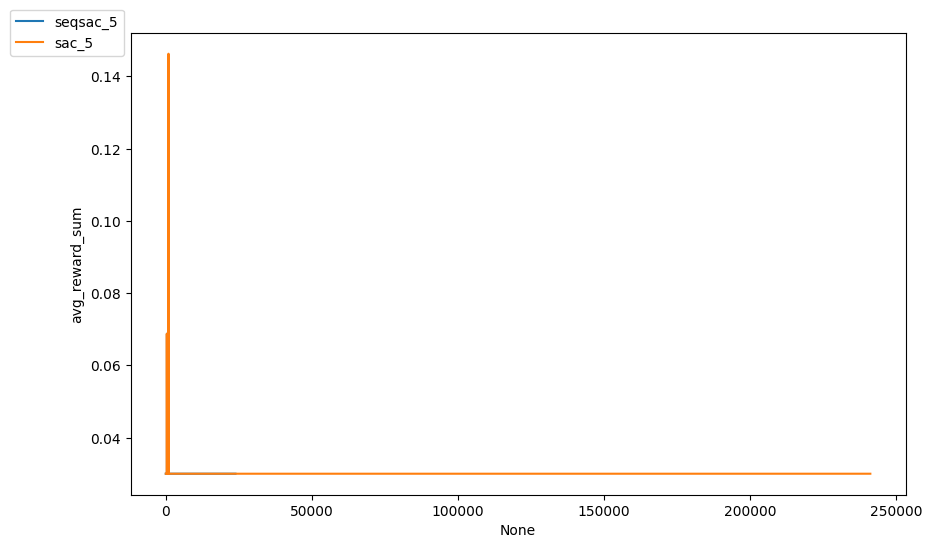

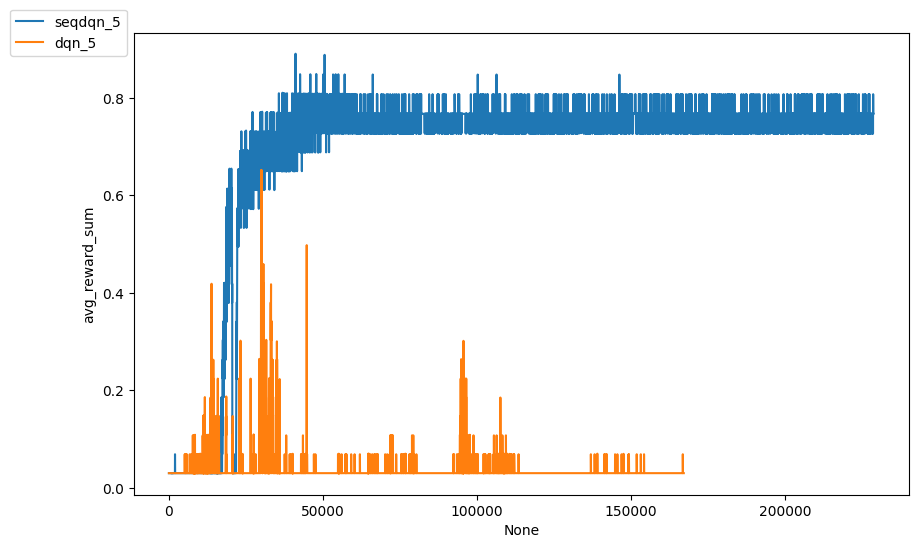

In [12]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "5_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<250000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df2 = df

plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("sac_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("dqn_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

training/meeting_training/seqdqn_6_1
seqdqn_6
succes
training/meeting_training/dqn_6_1
dqn_6
succes
training/meeting_training/seqsac_6_1
seqsac_6
succes
training/meeting_training/sac_6_1
sac_6
succes
all success


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

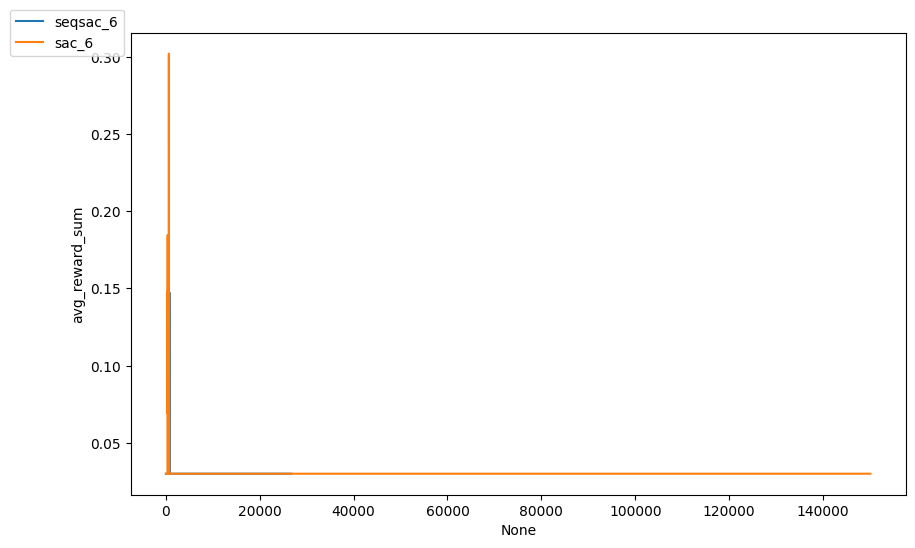

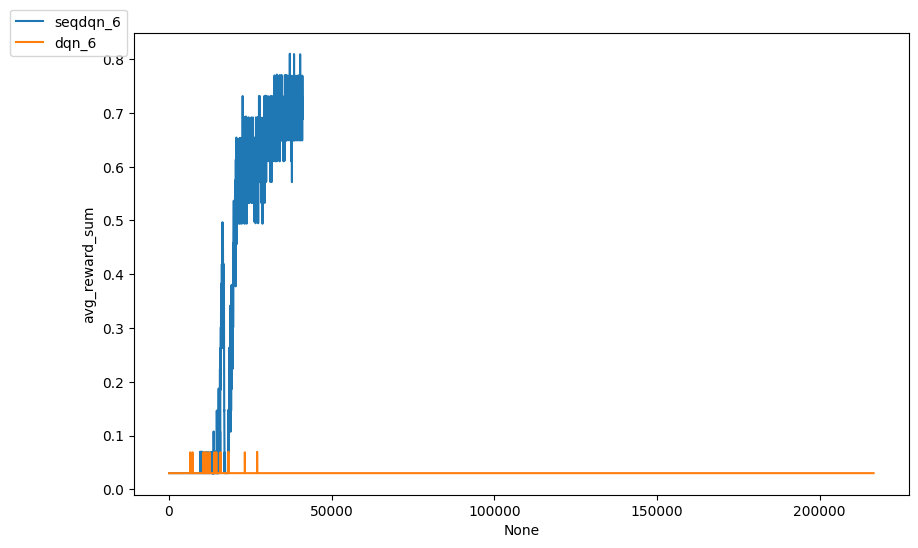

In [13]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "6_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<250000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df2 = df

plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("sac_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("dqn_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

training/meeting_training/seqdqn_7_1
seqdqn_7
succes
training/meeting_training/dqn_7_1
dqn_7
succes
training/meeting_training/seqsac_7_1
seqsac_7
succes
training/meeting_training/sac_7_1
sac_7
succes
all success


/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

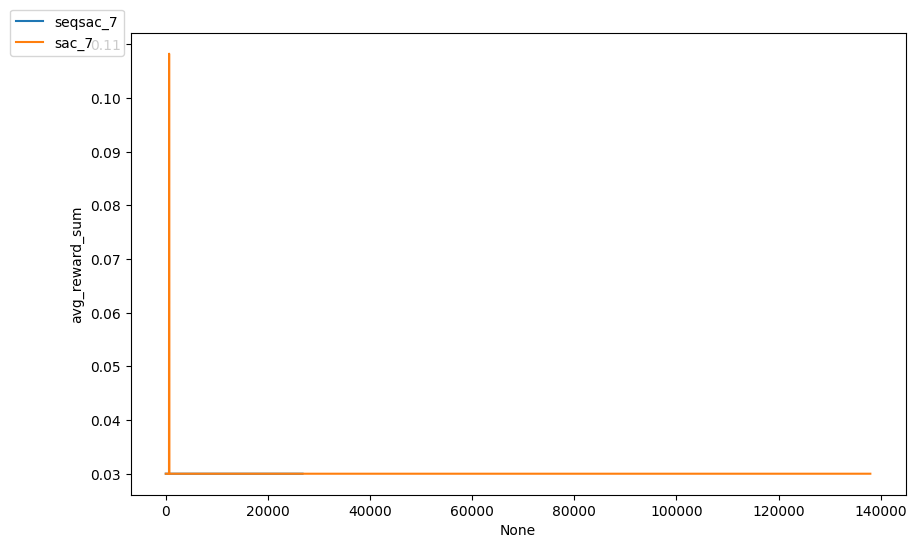

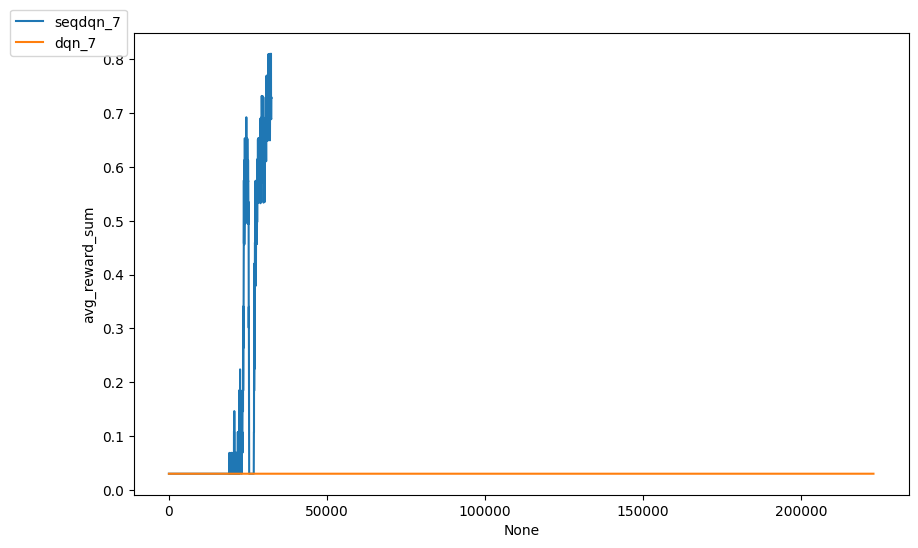

In [14]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_***', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_**', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_**', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "meeting" in file and not "meeting_training_old" in file and not "spread_training" in file and not "spider" in file and not "custom_agents" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])
tb_files = [file for file in tb_files if "7_1" in file ]

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "meeting_training/sac_" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/meeting_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)|((_)?(\d)?)$", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<250000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 25]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df2 = df

plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("sac_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)
plt.figure(figsize=(10,6))
df3 = df2[df2["dir_name"].str.contains("dqn_")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)